In [1]:
#Adds project path to sys.path for this kernel. Allows import of local packages
import os
import sys
print(os.getcwd())
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#ONLY RUN ONCE!
os.chdir(module_path)    
os.getcwd()

'/home/pascalwhoop/Documents/Code/University/powerTAC/python-agent'

In [3]:
import numpy as np
import keras
import pickle
import os
import sklearn
import pandas as pd
import time 
import matplotlib.pyplot as plt

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import CuDNNLSTM
from keras.models import Sequential
from sklearn import preprocessing

import statefiles.state_extractor as se
import agent_components.demand.generate_data_v1.data_generator as dg
import importlib
importlib.reload(se) #reloading own helper often, it's still changing during writing

/home/pascalwhoop/Documents/Code/University/powerTAC/python-agent/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<module 'statefiles.state_extractor' from '/home/pascalwhoop/Documents/Code/University/powerTAC/python-agent/statefiles/state_extractor.py'>

Parsing a whole state file and pushing it into the Environment object and its storages

In [6]:
state_extractor = se.StateExtractor()
game_path = state_extractor.get_state_files()[0]
lines = state_extractor.get_states_from_file(game_path)
environment = state_extractor.environment
state_extractor.parse_state_lines(lines, tick_callback=lambda: dg.tick_callback(environment))

IndexError: list index out of range

Okay let's explore this 

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

Let's get an overview of the preprocessing of the realised usage values

In [66]:
_c = y.flatten()
_x = np.array([np.zeros((len(y[0])))+i for i in range(len(y))]).flatten()
_y = (np.array(np.arange((len(_c))))%y.shape[1])
_data = np.array([_x,_y,_c]).transpose()
df = pd.DataFrame(_data, columns=["customers", "timeslots", "usage"])



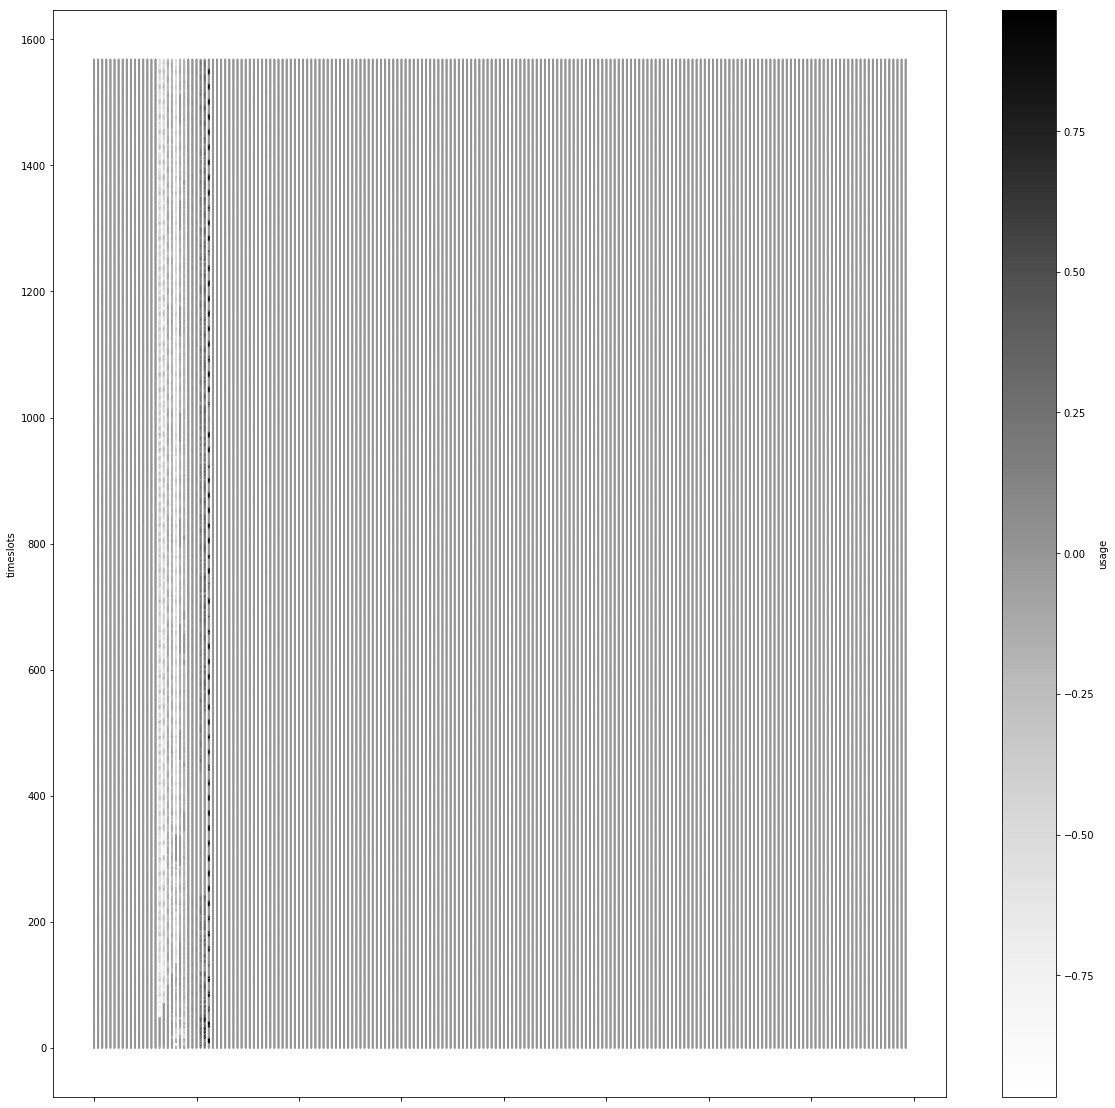

In [72]:
df.plot.scatter(x="customers", y="timeslots", c="usage", s=1, figsize=(20,20))

Normalzing and Scaling applied

In [12]:
from sklearn import preprocessing

In [18]:
preprocessing.normalize(y).flatten().shape

(312231,)

In [70]:
_rs = preprocessing.RobustScaler().fit_transform(y).flatten()
print(_rs.max())
_n = preprocessing.normalize(y.transpose()).transpose().flatten()
print(_n.max())

1.2986714993474384e+19
0.9650763176212376


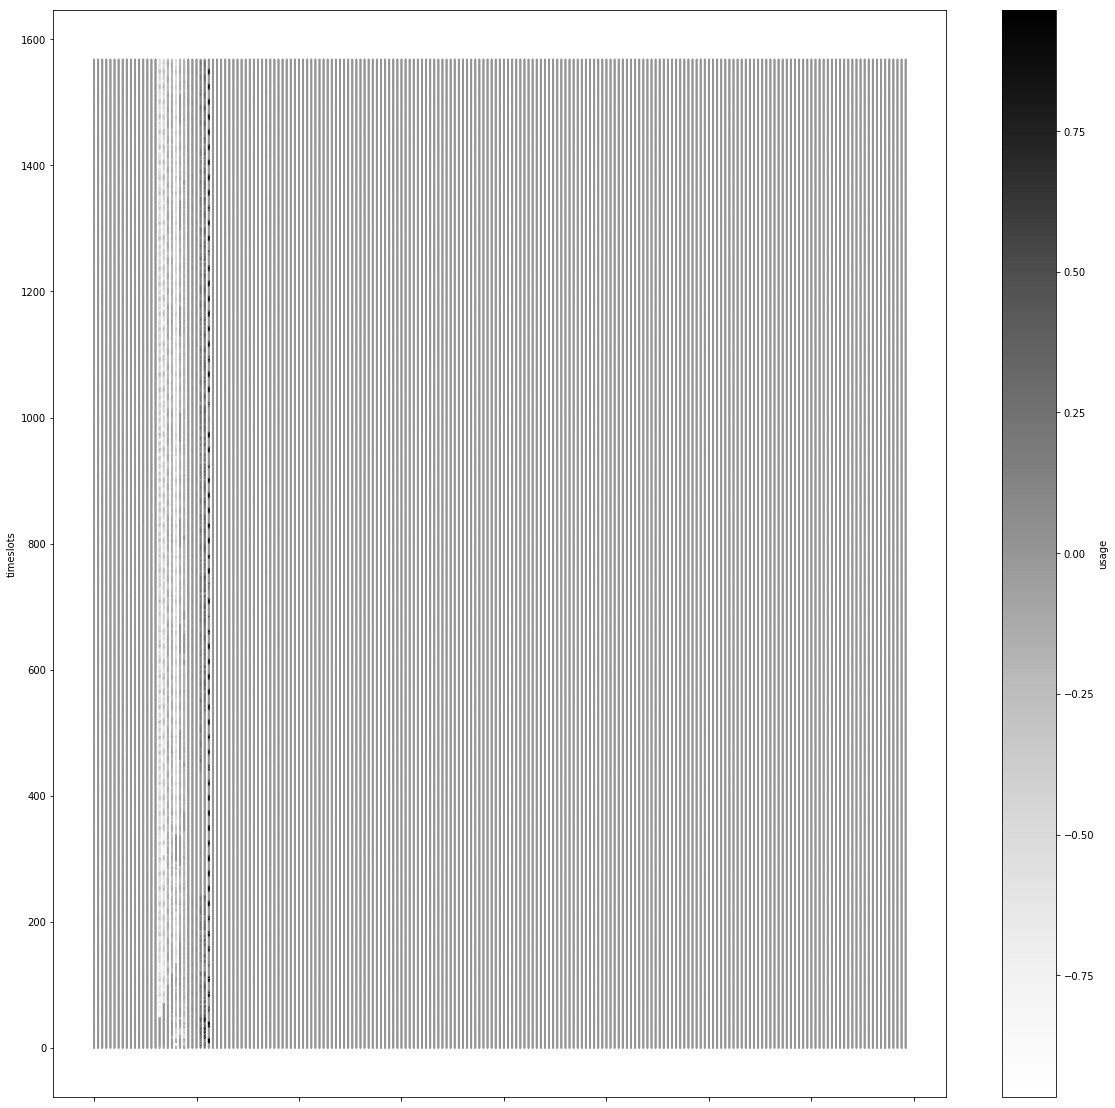

In [71]:
_x = np.array([np.zeros((len(y[0])))+i for i in range(len(y))]).flatten()
_y = (np.array(np.arange((len(_c))))%y.shape[1])
_data = np.array([_x,_y,_n]).transpose()
df = pd.DataFrame(_data, columns=["customers", "timeslots", "usage"])
df.plot.scatter(x="customers", y="timeslots", c="usage", s=1, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7abaeb4748>]],
      dtype=object)

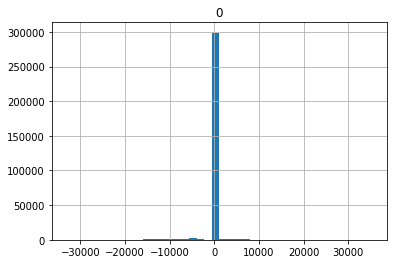

In [9]:
pd.DataFrame(_c).hist(bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7abad75160>]],
      dtype=object)

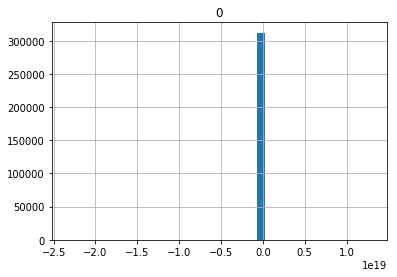

In [10]:
from sklearn import preprocessing
_y = preprocessing.RobustScaler().fit_transform(y)
pd.DataFrame(_y.flatten()).hist(bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7abac9d080>]],
      dtype=object)

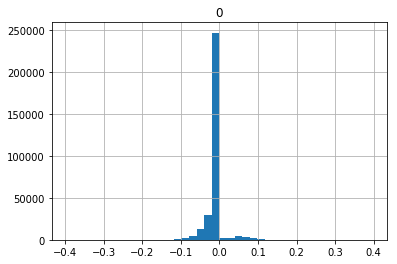

In [11]:
pd.DataFrame(preprocessing.normalize(y).flatten()).hist(bins=40)

In [19]:
y.shape

(199, 1569)

In [20]:
x[0,0]

array([10.  ,  1.  ,  0.  ,  0.  ,  0.  , -0.5 ,  0.  ,  0.  ,  0.  ,
        0.  ,  2.  ,  7.  , 24.  , 14.  , 17.  ,  0.  ,  0.24])

In [21]:
x = x.astype(np.float)
x[0,0]

array([10.  ,  1.  ,  0.  ,  0.  ,  0.  , -0.5 ,  0.  ,  0.  ,  0.  ,
        0.  ,  2.  ,  7.  , 24.  , 14.  , 17.  ,  0.  ,  0.24])

In [22]:
y = y.astype(np.float)

# Visualisation of data

## Customer data

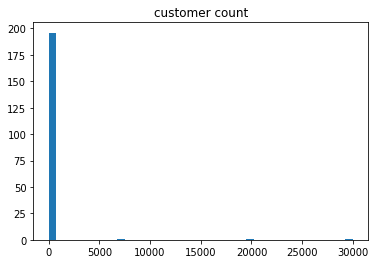

In [23]:
fig, ax = plt.subplots()
ax.hist(x[:,0,0].flatten(), 40)
ax.set_title("customer count")
plt.show()

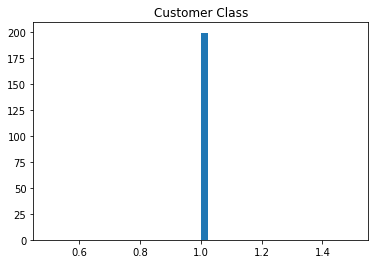

In [24]:
fig, ax = plt.subplots()
ax.hist(x[:,0,1].flatten(), 40)
ax.set_title("Customer Class")
plt.show()

The customer class variable seems quiet boring. They are all the same. But it also suggests I made a mistake here.

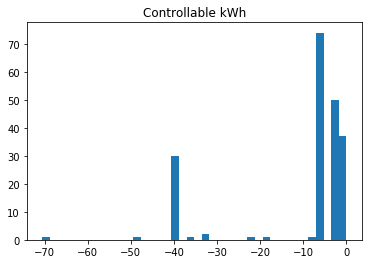

In [25]:
fig, ax = plt.subplots()
ax.hist(x[:,0,2].flatten(), 40)
ax.set_title("Controllable kWh")
plt.show()

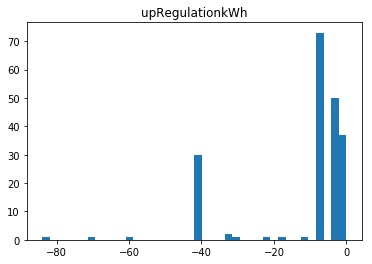

In [26]:
fig, ax = plt.subplots()
ax.hist(x[:,0,3].flatten(), 40)
ax.set_title("upRegulationkWh")
plt.show()

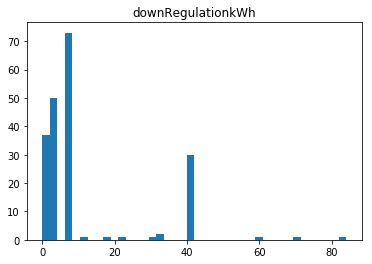

In [27]:
fig, ax = plt.subplots()
ax.hist(x[:,0,4].flatten(), 40)
ax.set_title("downRegulationkWh")
plt.show()

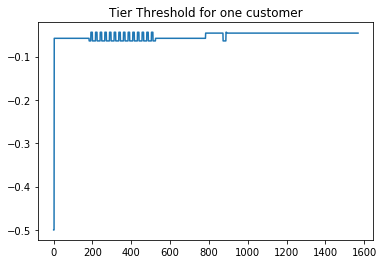

In [28]:
fig, ax = plt.subplots()
_y = x[1,:,5].flatten()
_x = np.arange(len(_y))
ax.plot(_x,_y)
ax.set_title("Tier Threshold for one customer")
plt.show()

## Weather data

`[13-17]`

*using pandas*

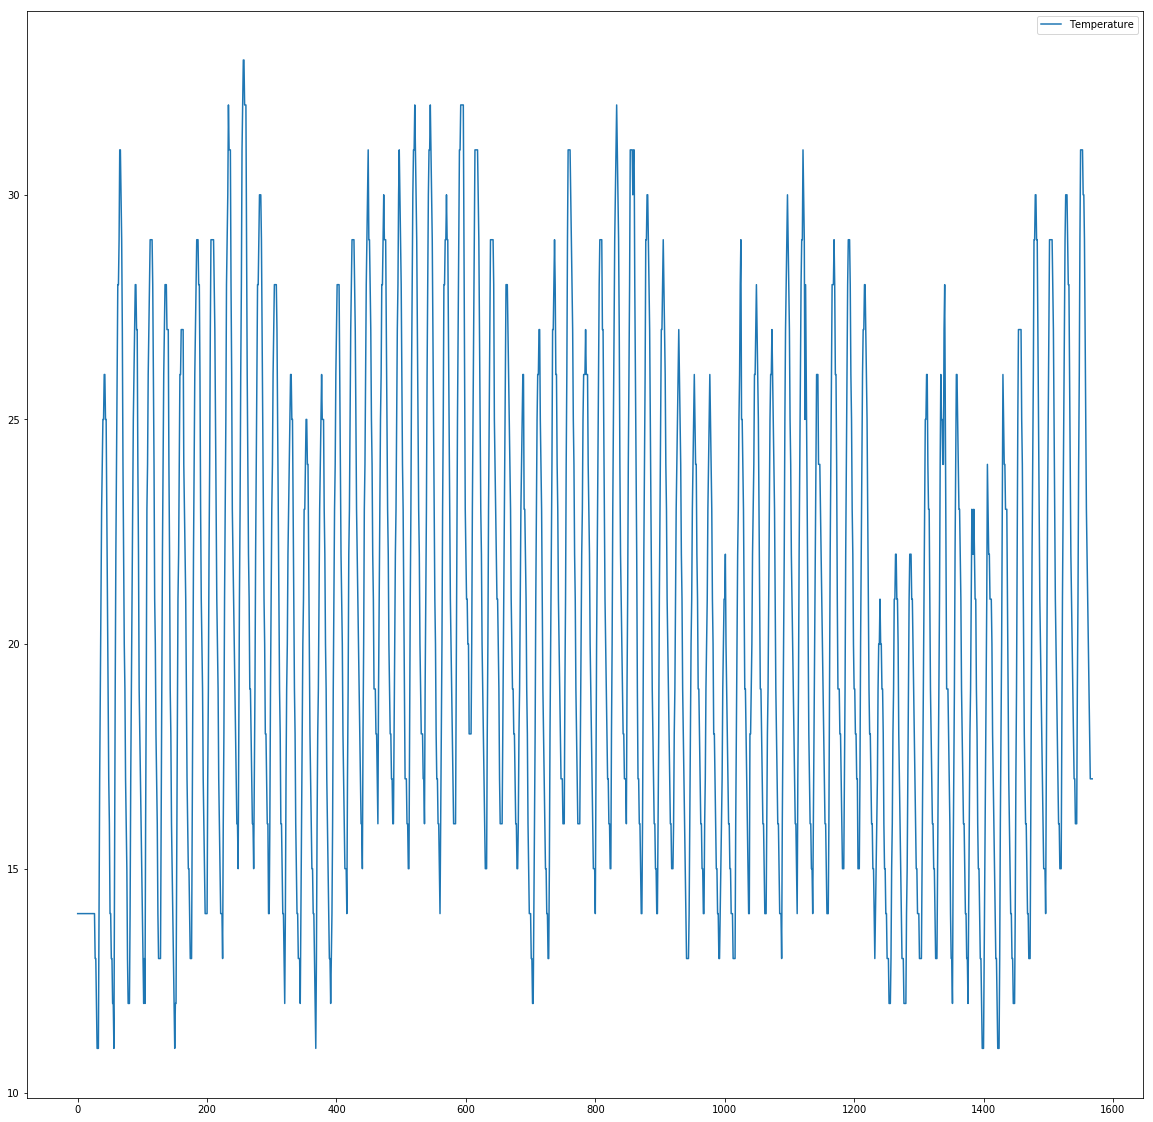

In [29]:
ts = pd.DataFrame(x[0,:,13].flatten(), columns=["Temperature"])
ts.plot(figsize=(20,20))


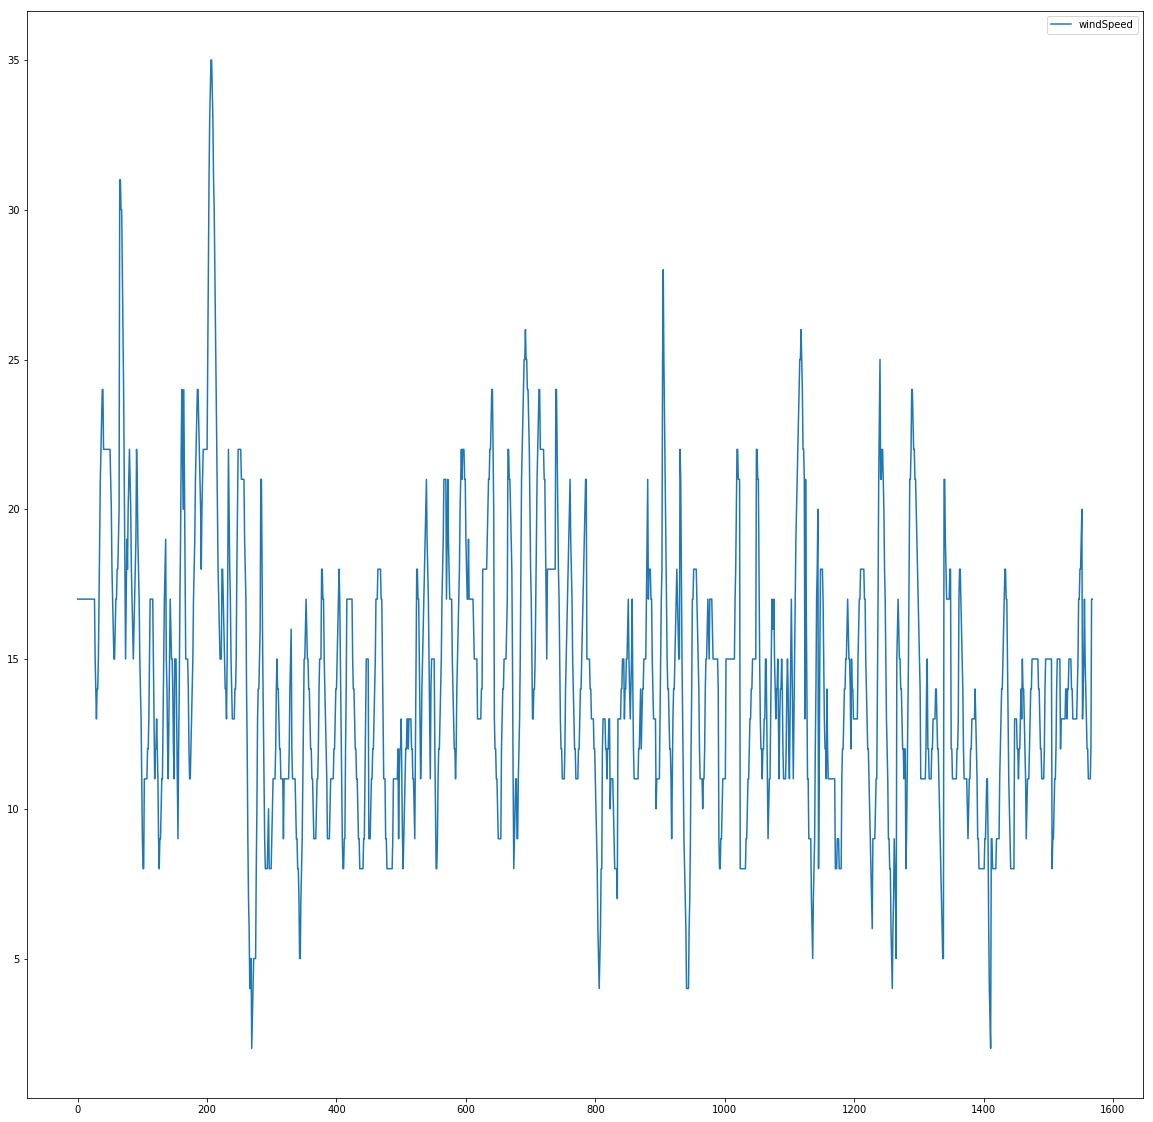

In [30]:
ts = pd.DataFrame(x[0,:,14].flatten(), columns=["windSpeed"])
ts.plot(figsize=(20,20))


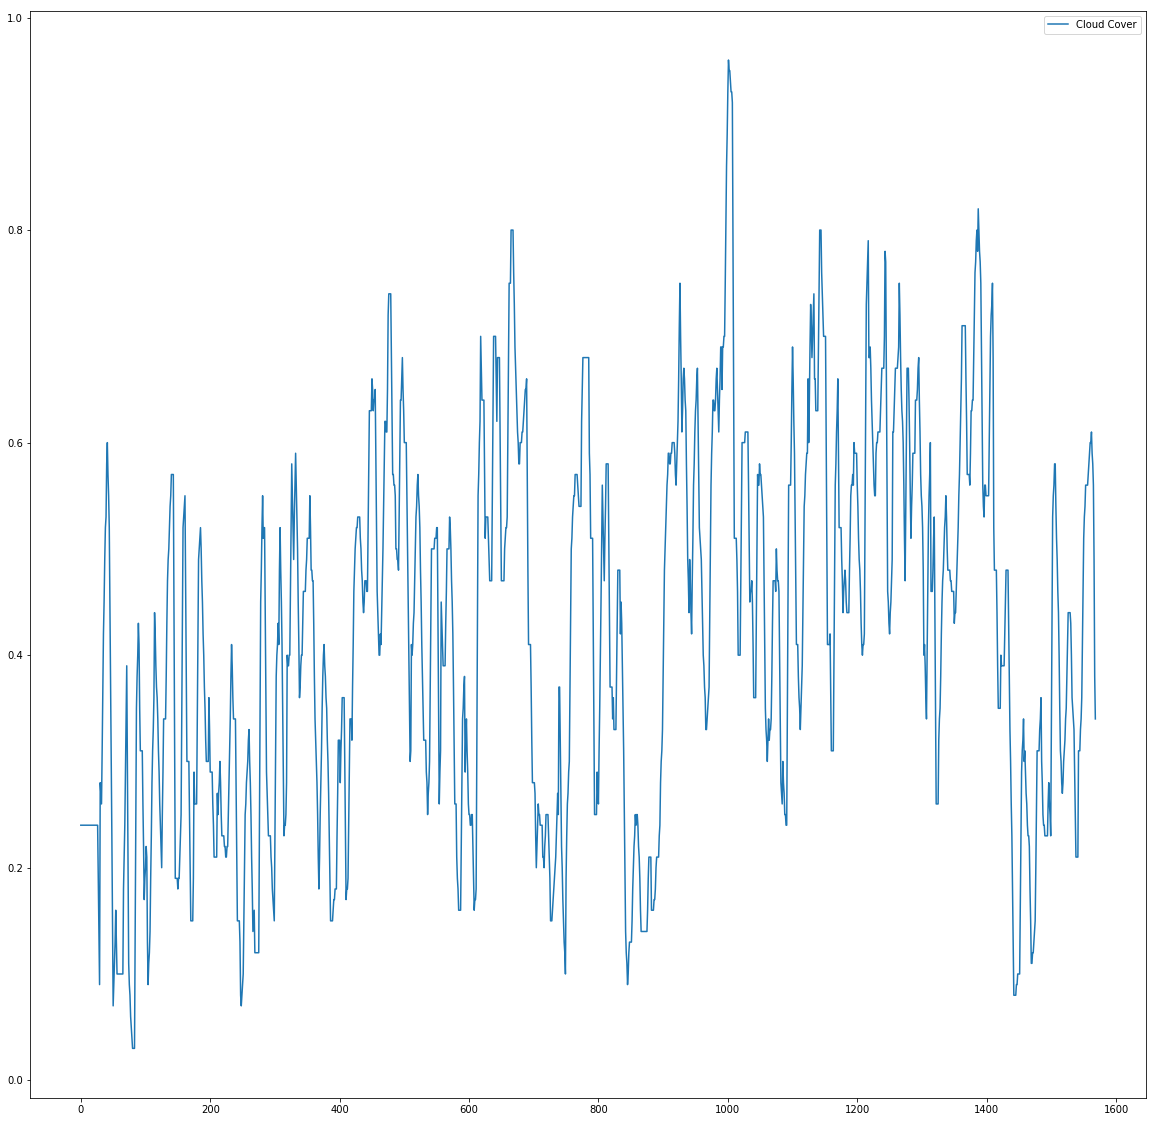

In [31]:
    ts = pd.DataFrame(x[0,:,16].flatten(), columns=["Cloud Cover"])
    ts.plot(figsize=(20,20))


(1569, 4)
(1569, 2)


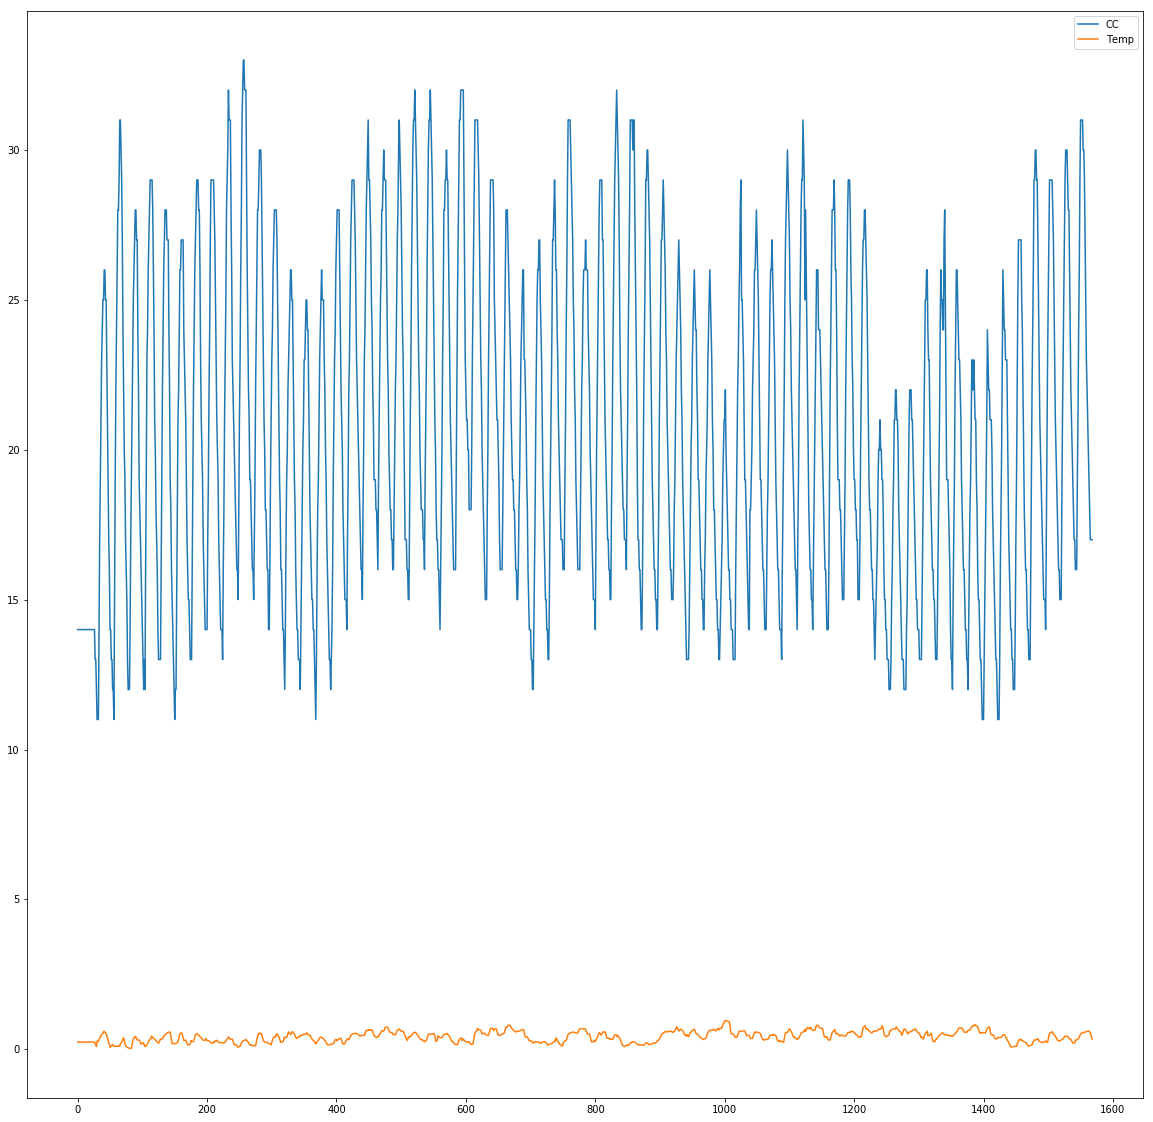

In [32]:
_x = x[0,:,13:18]
print(_x.shape)
_x = np.array([_x[:,0], _x[:,-1]]).transpose()
print(_x.shape)
ts = pd.DataFrame(_x, columns=["CC", "Temp"])
ts.plot(figsize=(20,20))

Okay let's normalize that a bit

(1569, 4)
(1569, 2)


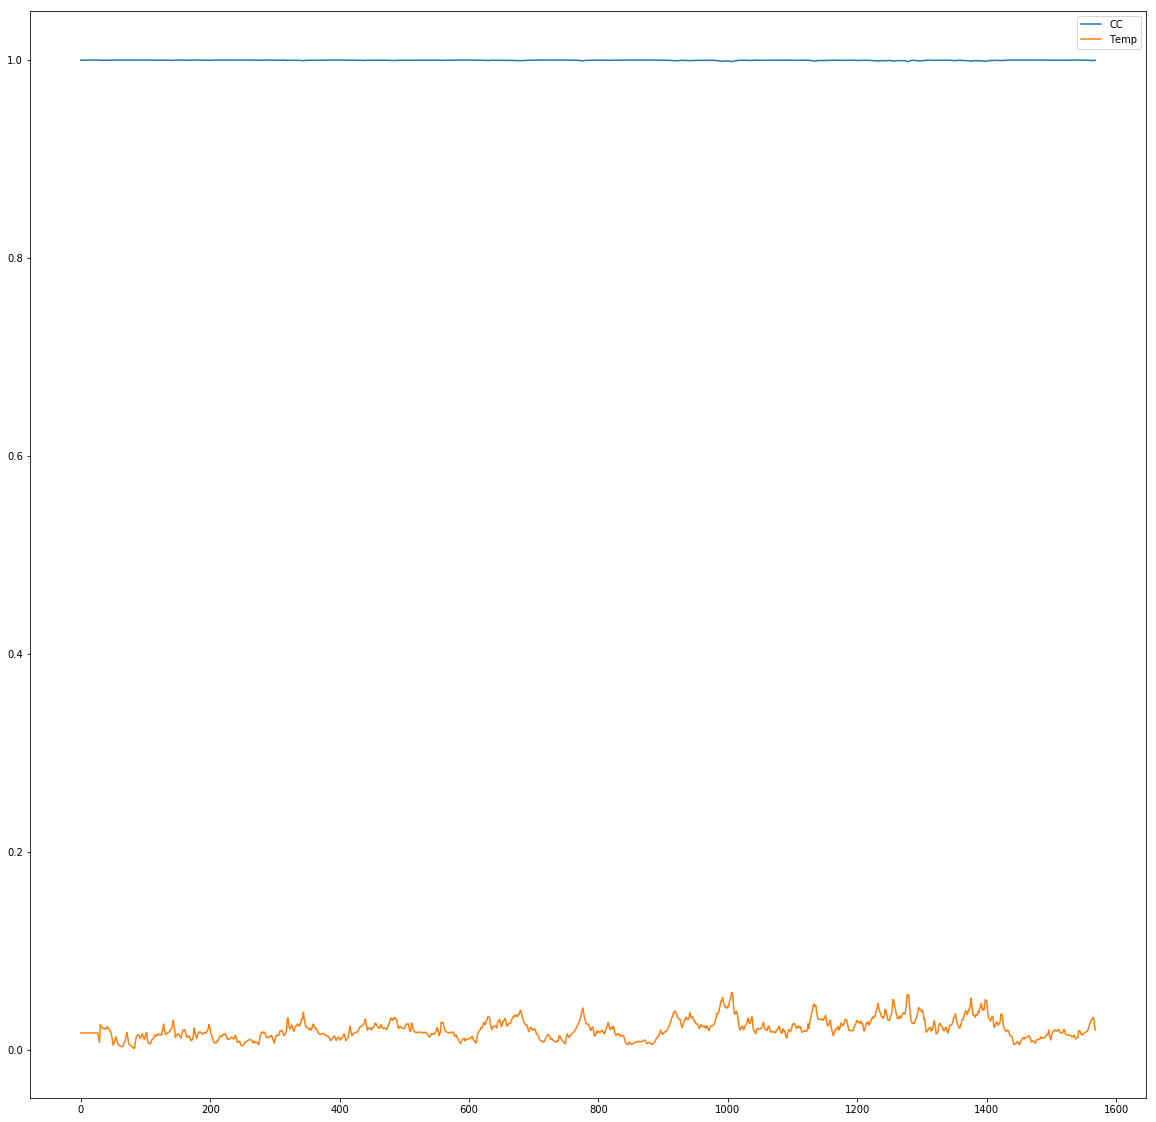

In [33]:
_x = x[0,:,13:18]
print(_x.shape)
_x = np.array([_x[:,0], _x[:,-1]]).transpose()
print(_x.shape)
_x = preprocessing.normalize(_x)
ts = pd.DataFrame(_x, columns=["CC", "Temp"])
ts.plot(figsize=(20,20))

(1569, 4)
(1569, 2)


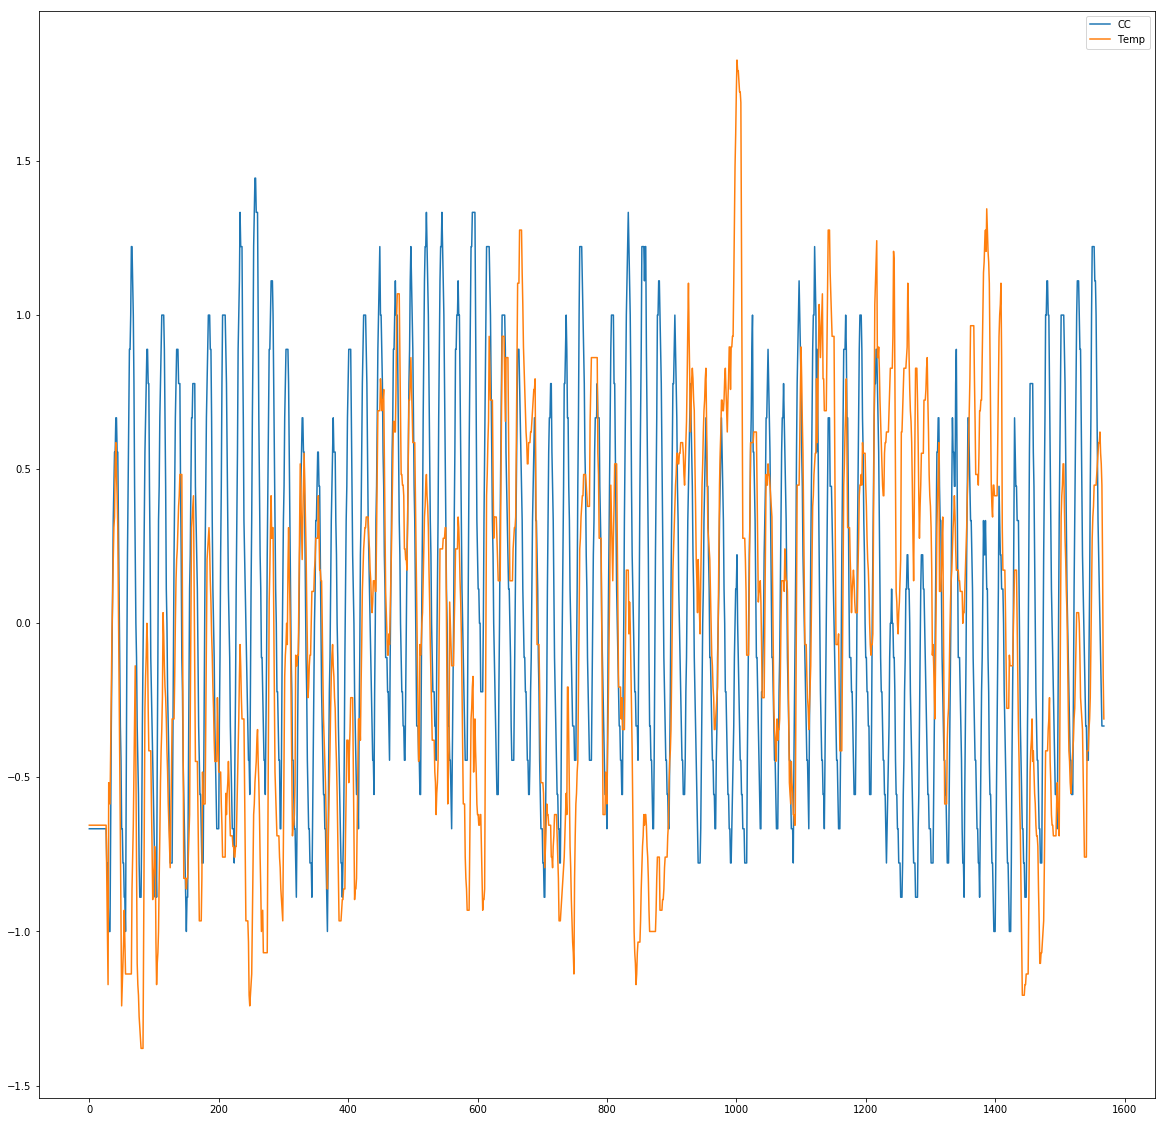

In [150]:
_x = x[0,:,13:18]
print(_x.shape)
_x = np.array([_x[:,0], _x[:,-1]]).transpose()
print(_x.shape)
_x = preprocessing.RobustScaler().fit_transform(_x)
ts = pd.DataFrame(_x, columns=["CC", "Temp"])
ts.plot(figsize=(20,20))

Creating a boxplot visualizing the RobustScaler effect on the usage data of several customers in one game. 

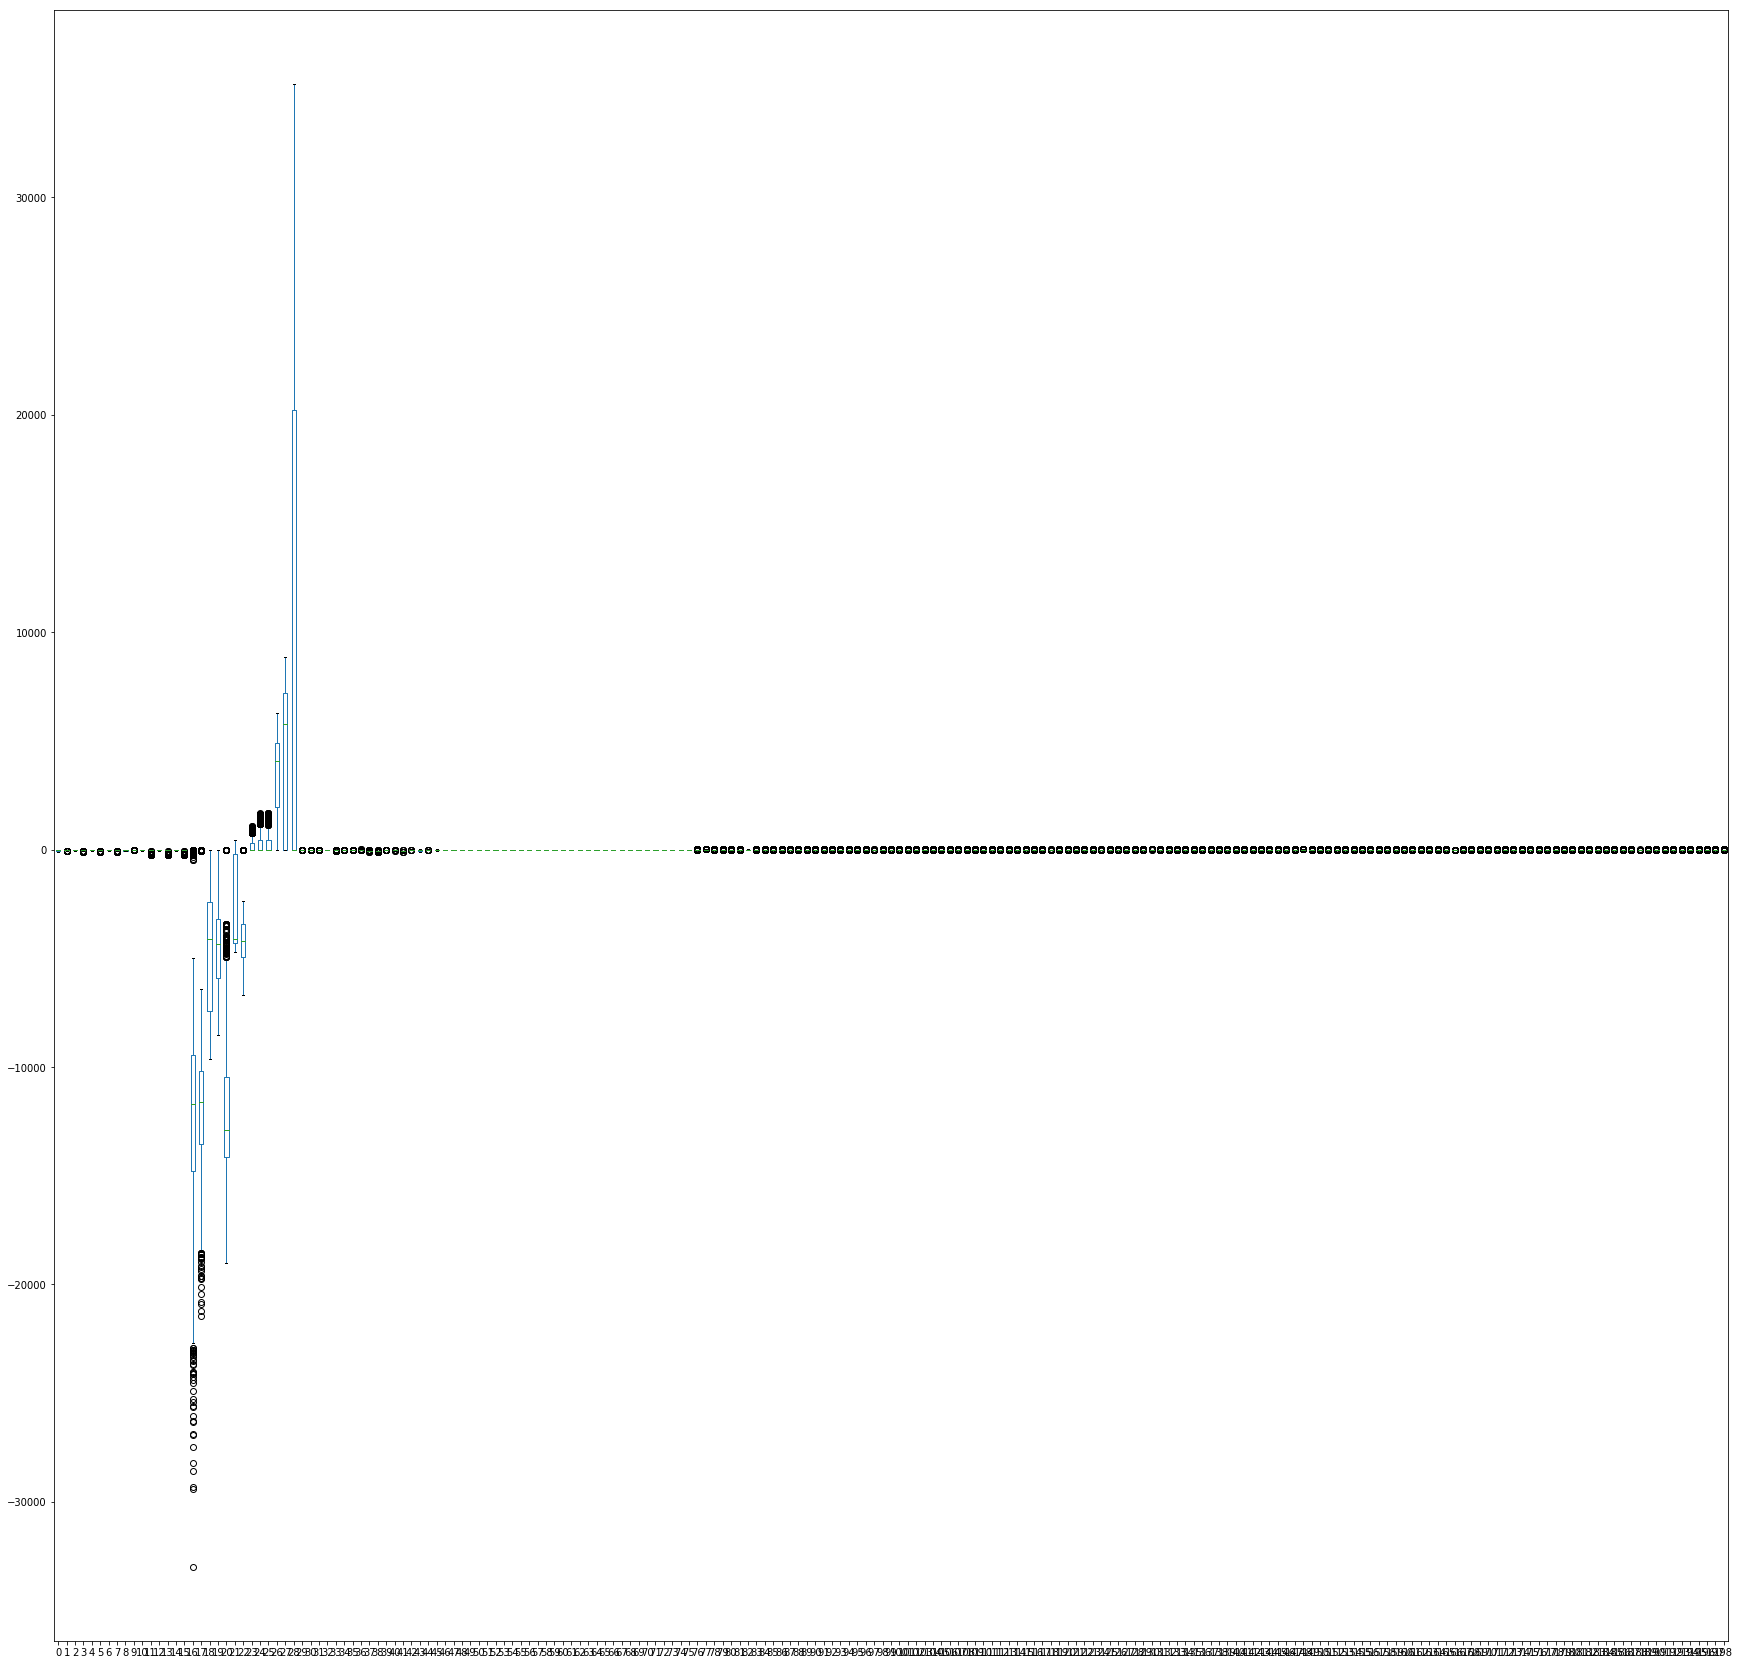

In [71]:
df = pd.DataFrame(y.transpose())
df.plot.box(figsize=(30,30))

Outliers are dominating the boxplot, whereas we want them to be better distributed

In [65]:
_data = preprocessing.RobustScaler().fit_transform(y.transpose())
print(_data.shape)

(1569, 199)


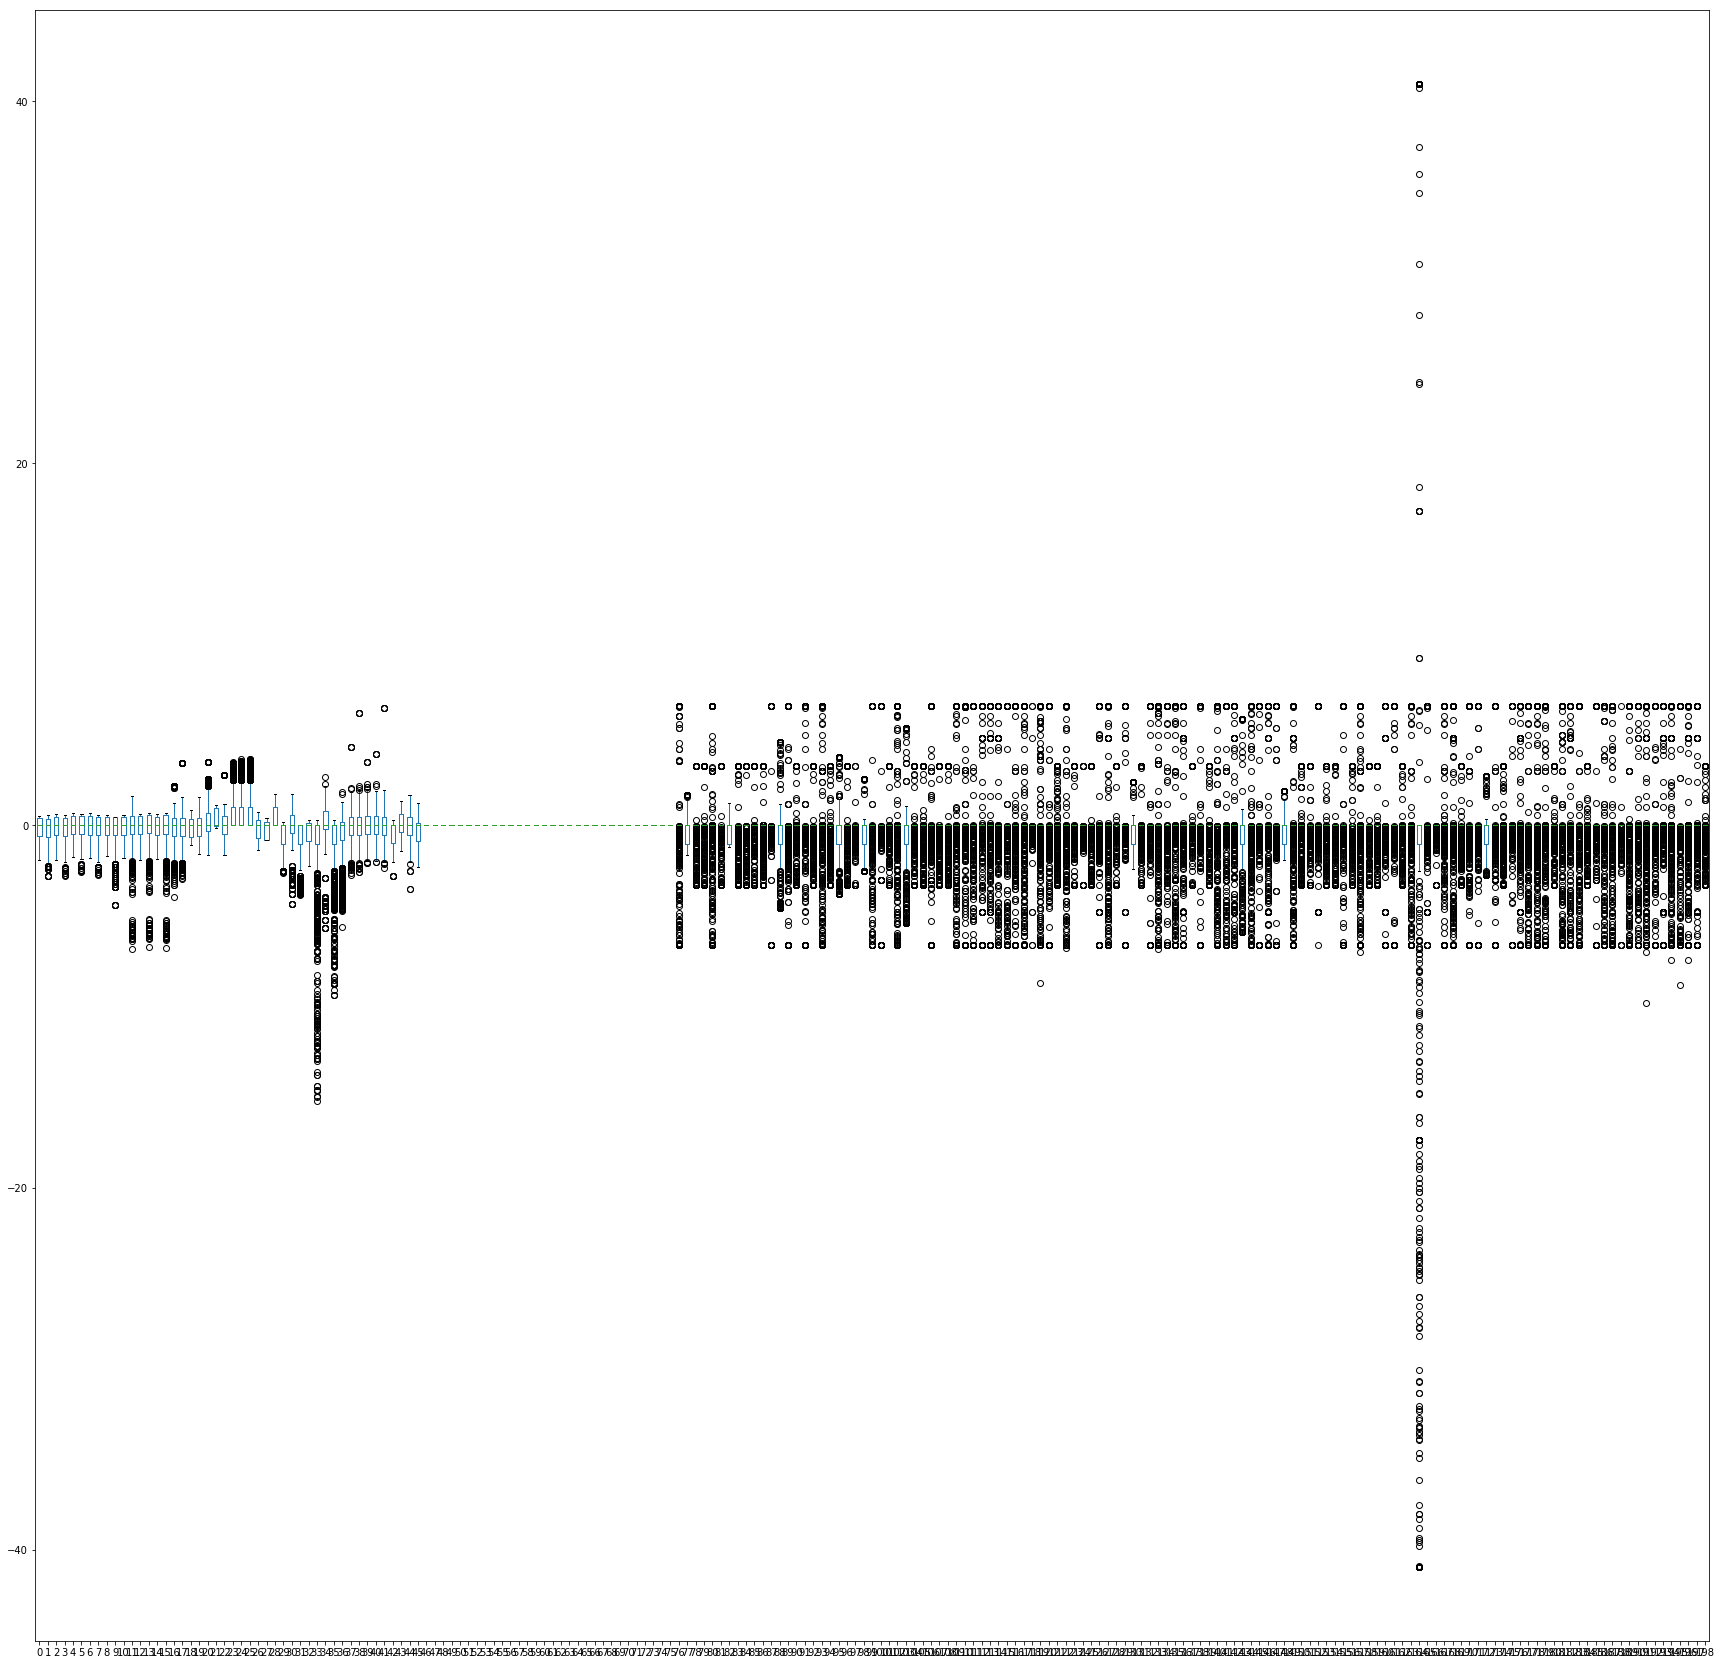

In [67]:
df = pd.DataFrame(_data)
df.plot.box(figsize=(30,30))

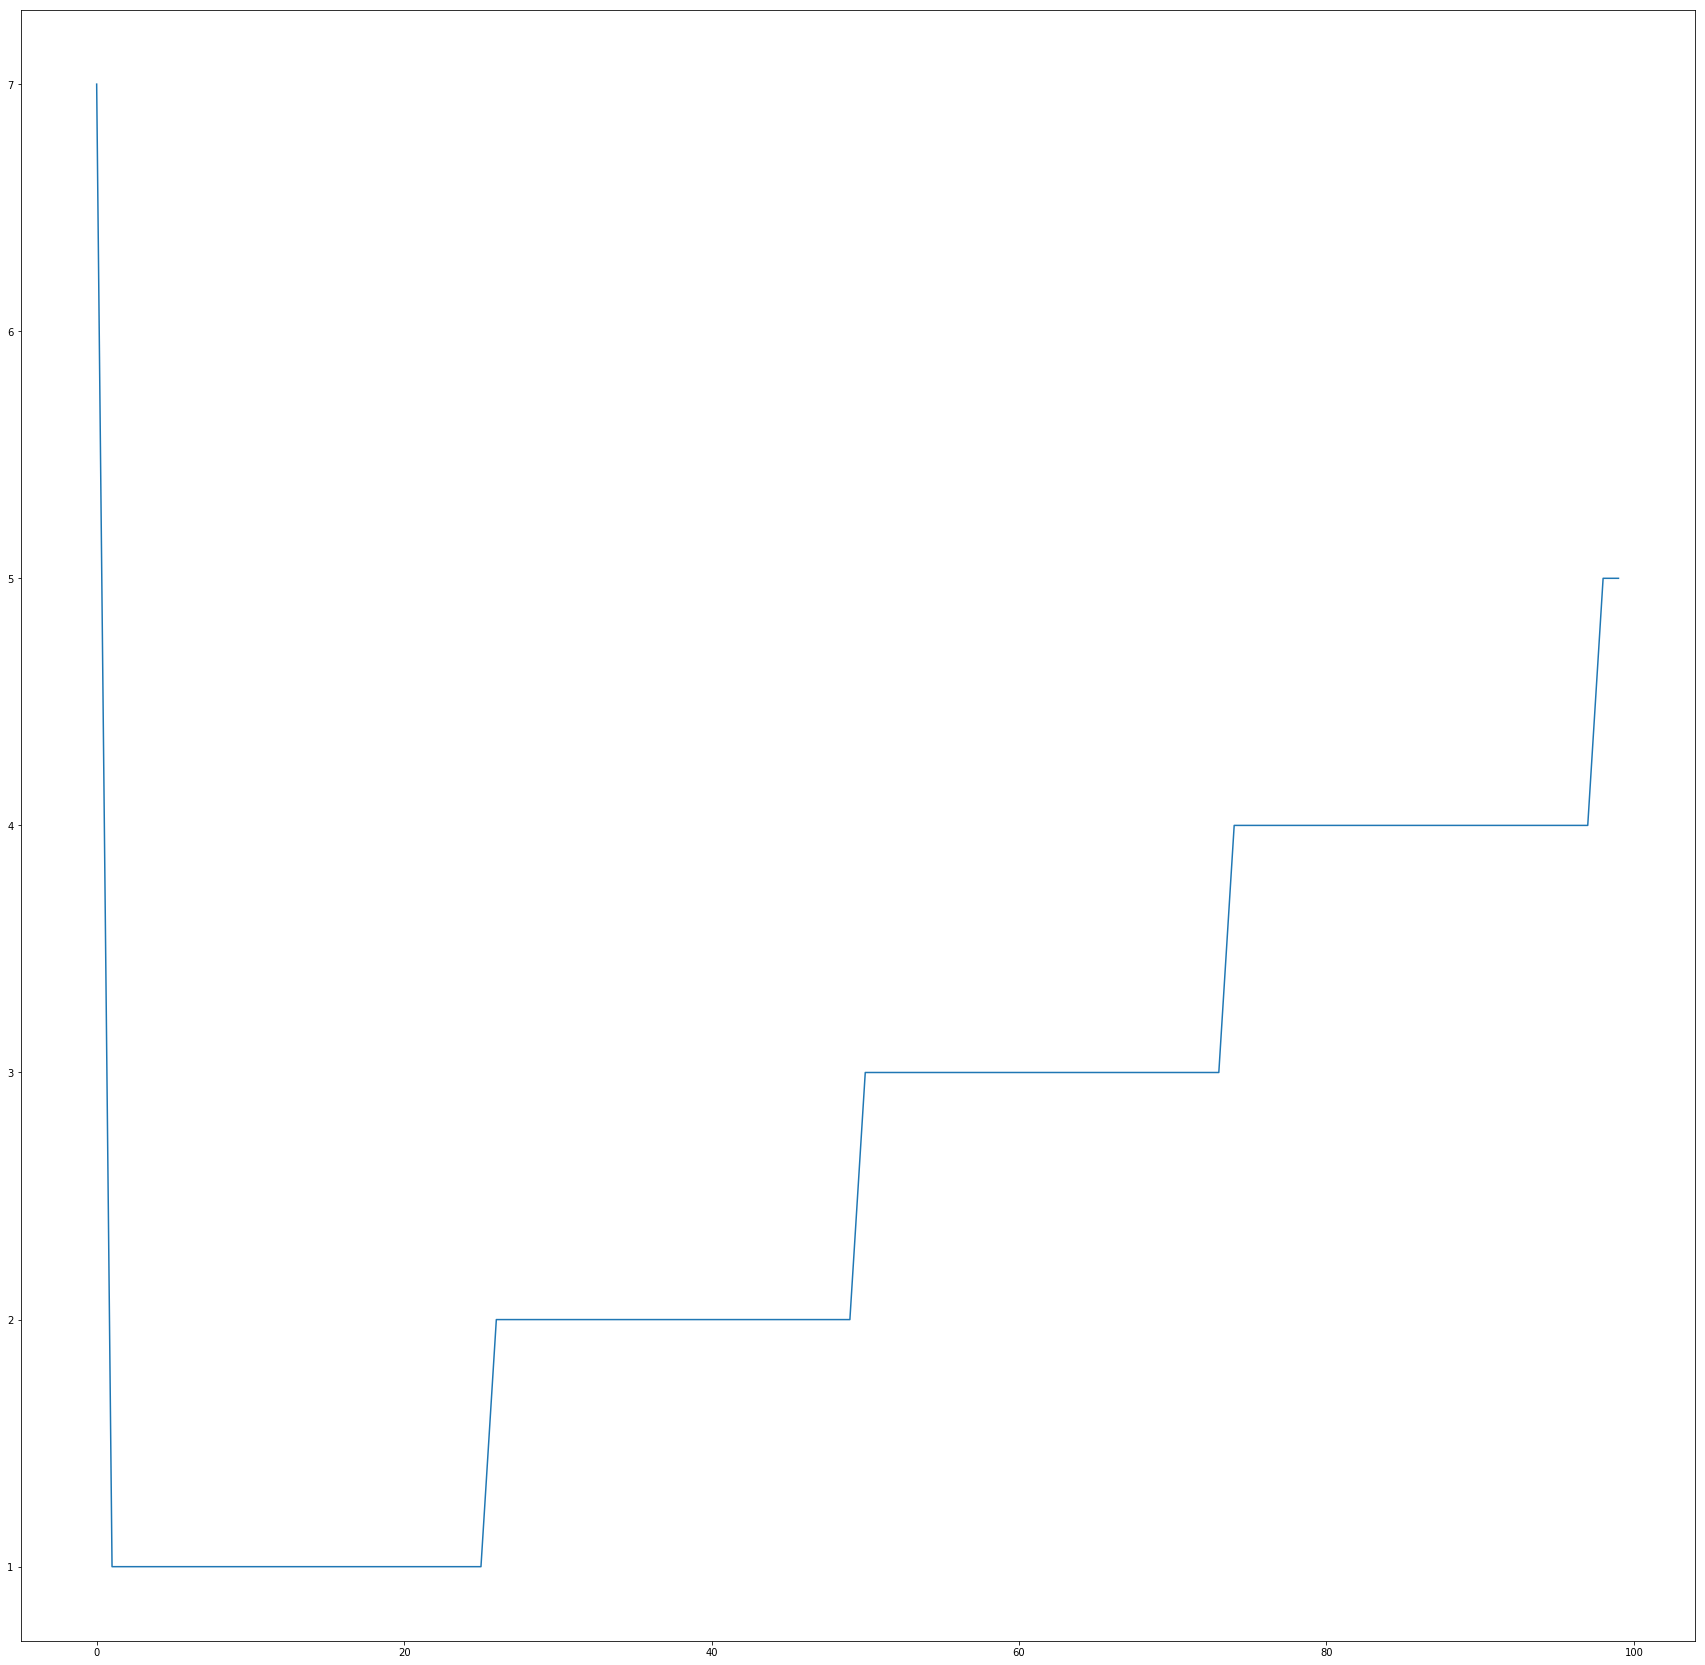

In [76]:
pd.Series(x[0,:100,11]).plot(figsize=(30,30))

Let's visualize the overall energy usage of an entire population:

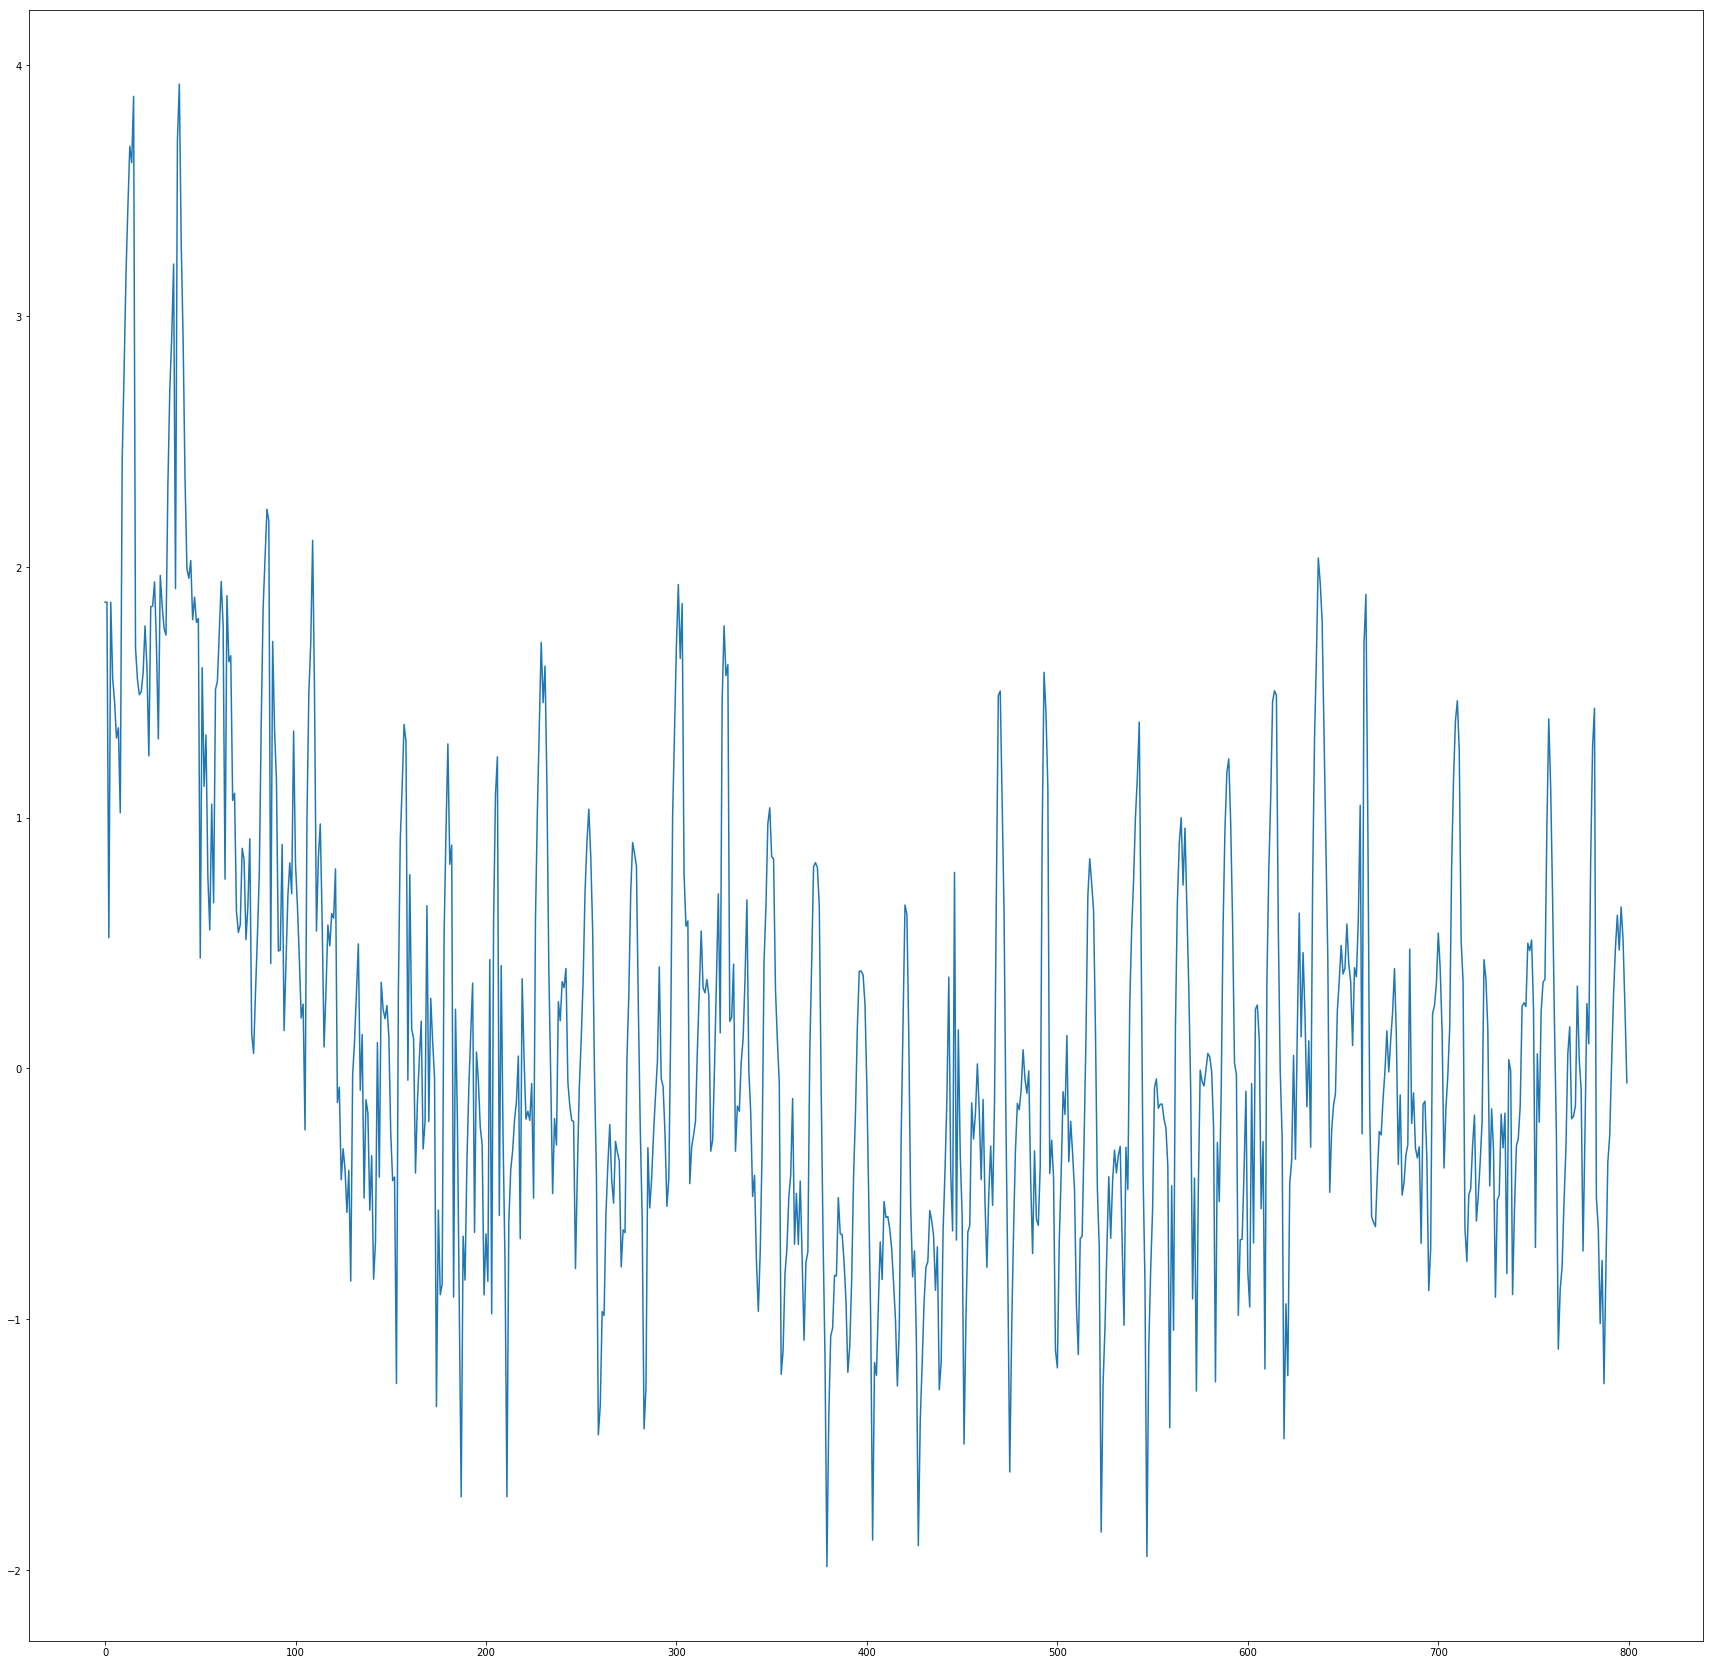

In [95]:
summed = y.sum(axis=0)
pd.Series(preprocessing.RobustScaler().fit_transform(summed.reshape(-1,1)).flatten()[:800]).plot(figsize=(30,30))

Autocorellation of the sum of the entire populations usage data

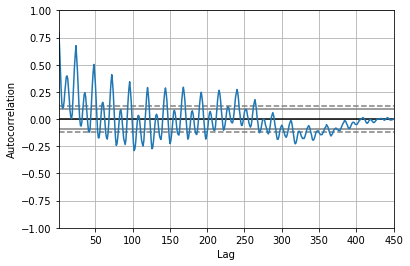

In [93]:
pd.plotting.autocorrelation_plot(pd.Series(summed[50:]))

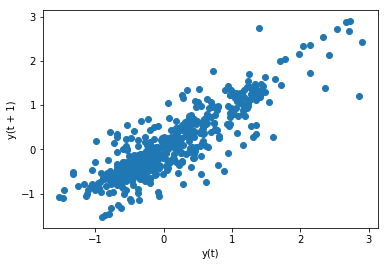

In [89]:
pd.plotting.lag_plot(pd.Series(preprocessing.RobustScaler().fit_transform(summed.reshape(-1,1)).flatten()))